In [157]:
import pandas as pd
import numpy as np

In [158]:
df = pd.read_csv('./departures_for_foreign_employment_through_private_sources_&_through_agencies_1997_2012_0.csv')

In [159]:
df.columns = [col.strip() for col in df.columns]

In [160]:
df = df.loc[:,['Year','Self Basis Male','Self Basis Female', 'Through Agencies Male', 'Through Agencies Female']]
df.set_index('Year', inplace=True)

In [161]:
df.describe()

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
count,16.000000,16.000000,16.000000,16.000000
mean,42121.187500,27962.750000,48664.062500,96656.875000
std,20870.259341,4335.958279,13876.447381,10588.208976
min,10048.000000,22662.000000,27504.000000,77614.000000
25%,27811.750000,24738.000000,34861.000000,88410.250000
50%,35571.000000,26857.000000,49863.500000,95651.000000
75%,59228.750000,30372.000000,58433.500000,105098.250000
max,80267.000000,36401.000000,71805.000000,112676.000000


In [162]:
df_stacked = df.stack().reset_index()
df_stacked.columns = ['index', 'key', 'value']

In [163]:
df_stacked

,index,key,value
0,1997,Self Basis Male,10048
1,1997,Self Basis Female,25185
2,1997,Through Agencies Male,27504
3,1997,Through Agencies Female,87546
4,1998,Self Basis Male,18918
...,...,...,...
59,2011,Through Agencies Female,90253
60,2012,Self Basis Male,71979
61,2012,Self Basis Female,35086
62,2012,Through Agencies Male,71805


<Axes: title={'center': 'value'}, xlabel='key'>

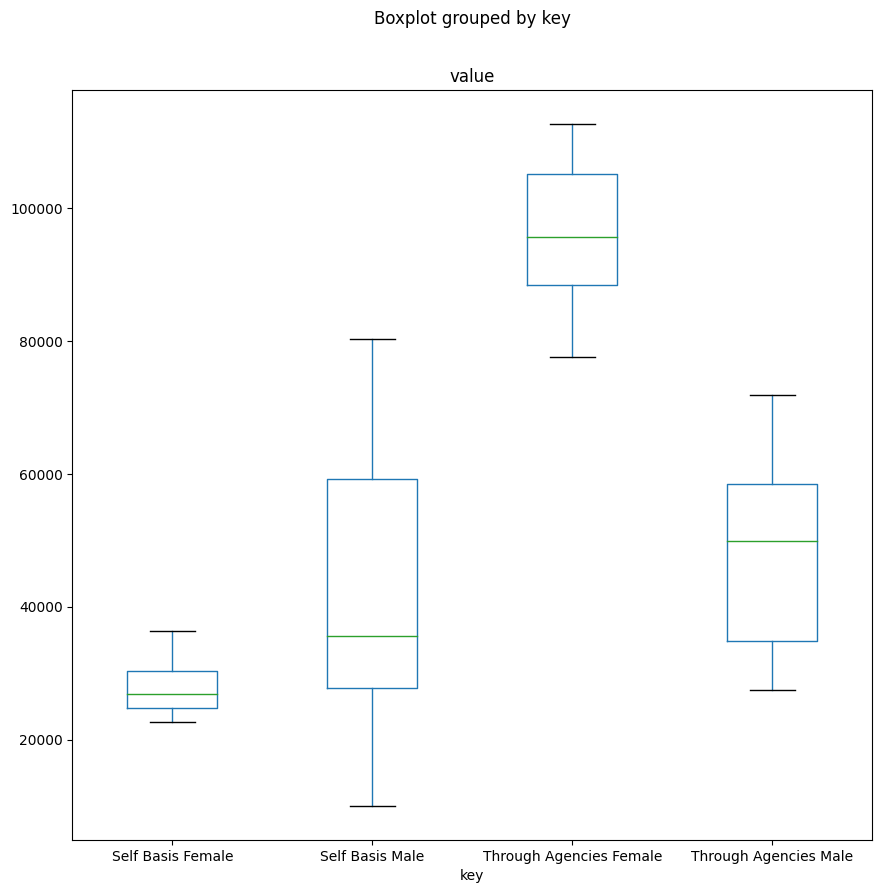

In [164]:
df_stacked.boxplot(by ='key', column =['value'], grid = False, figsize=(10, 10))

In [165]:
df_all_sum

key
Self Basis Female           447404
Self Basis Male             673939
Through Agencies Female    1546510
Through Agencies Male       778625
Name: value, dtype: int64

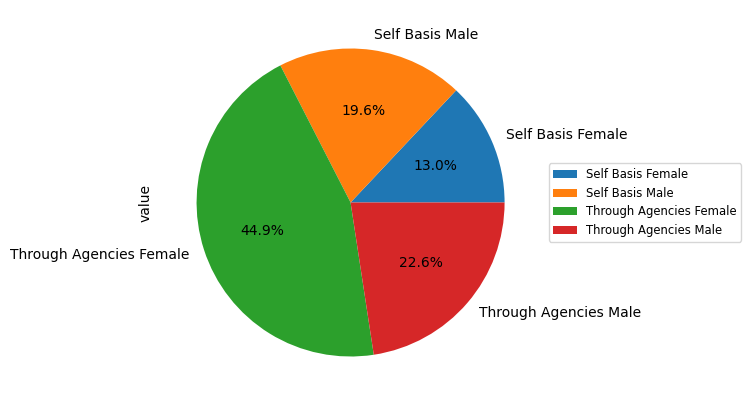

In [168]:
df_all_sum = df_stacked.groupby(['key']).value.sum()
ax = df_all_sum.plot(kind='pie', y='value', labels=df_all_sum.index, autopct='%1.1f%%', figsize=(5, 5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small')

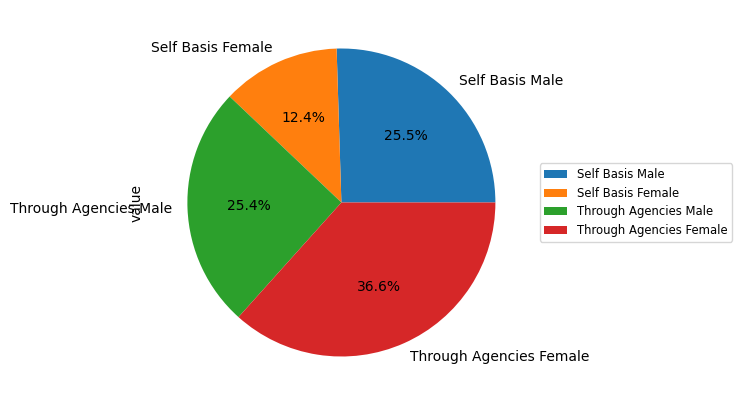

In [169]:
df_stacked_year = df_stacked[df_stacked['index'] == 2012]
ax = df_stacked_year.plot(kind='pie', y='value', labels=df_stacked_year['key'], autopct='%1.1f%%', figsize=(5, 5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small')

In [170]:
df

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
Year,,,,
1997,10048,25185,27504,87546
1998,18918,28335,34949,77614
1999,29123,29985,34597,86030
2000,27157,27416,32636,94979
2001,26620,24920,33187,99280
2002,28030,22769,42492,110482
2003,32487,22662,42021,112676
2004,34563,24000,46136,110010
2005,40146,25437,53750,111957


<Axes: xlabel='Year'>

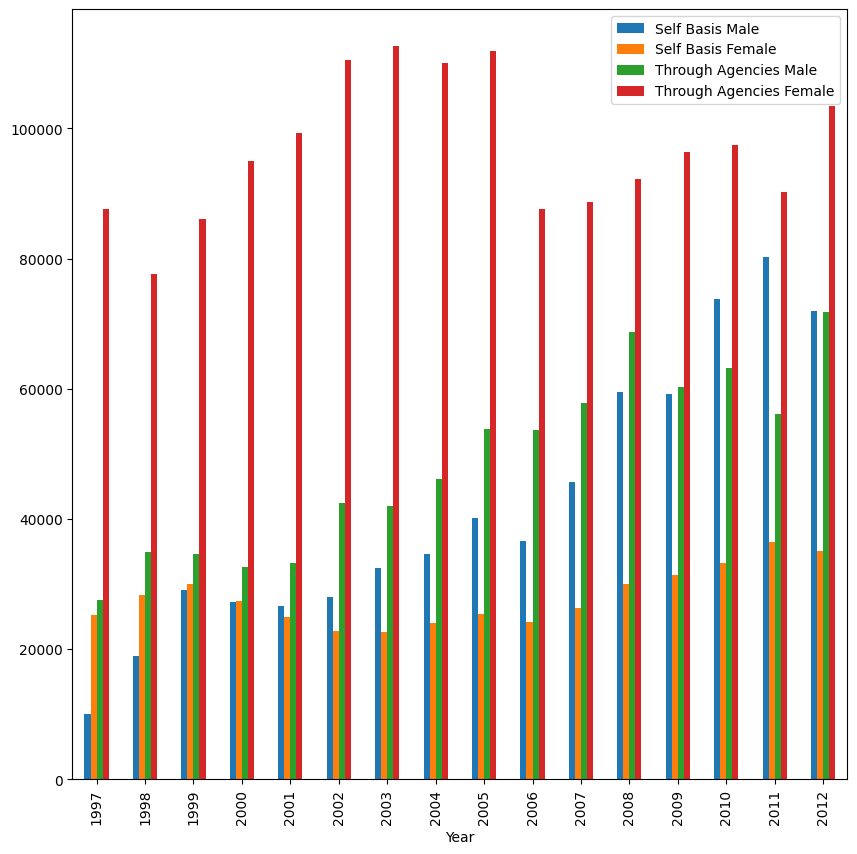

In [171]:
df.plot.bar(y=['Self Basis Male', 'Self Basis Female', 'Through Agencies Male', 'Through Agencies Female'], figsize=(10, 10))

<Axes: xlabel='Year'>

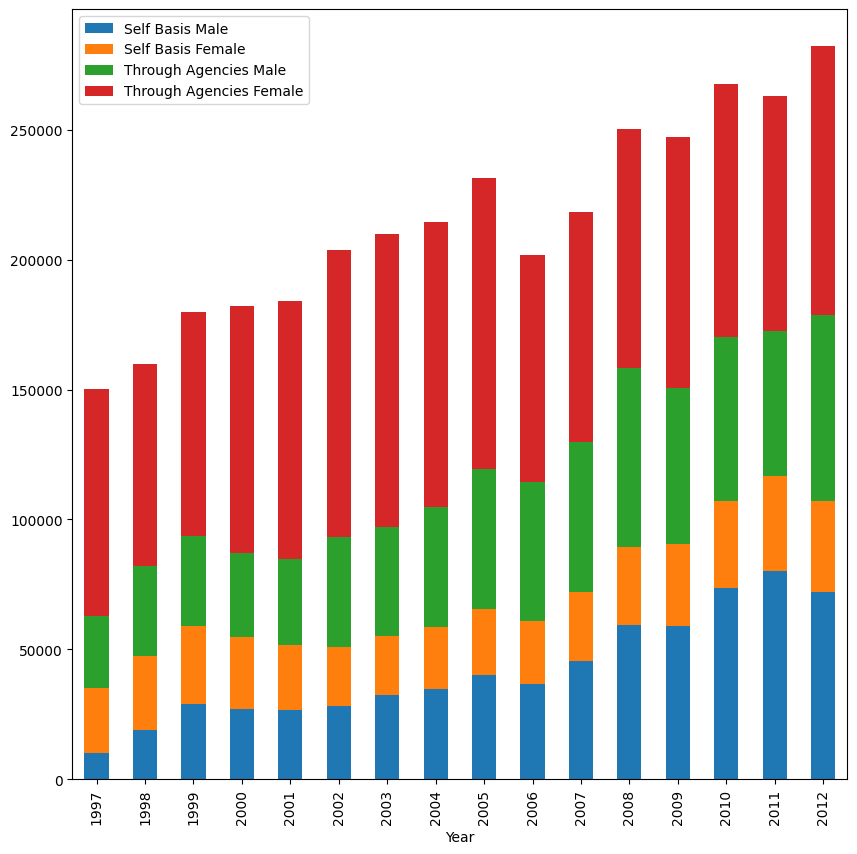

In [172]:
df.plot.bar(y=['Self Basis Male', 'Self Basis Female', 'Through Agencies Male', 'Through Agencies Female'], figsize=(10, 10), stacked=True)

In [173]:
df

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
Year,,,,
1997,10048,25185,27504,87546
1998,18918,28335,34949,77614
1999,29123,29985,34597,86030
2000,27157,27416,32636,94979
2001,26620,24920,33187,99280
2002,28030,22769,42492,110482
2003,32487,22662,42021,112676
2004,34563,24000,46136,110010
2005,40146,25437,53750,111957


In [174]:
df['total'] = df.sum(axis=1)

In [175]:
df_main_gender_summary = df.drop(columns=['total'], inplace=False)

In [176]:
df_main_gender_summary

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
Year,,,,
1997,10048,25185,27504,87546
1998,18918,28335,34949,77614
1999,29123,29985,34597,86030
2000,27157,27416,32636,94979
2001,26620,24920,33187,99280
2002,28030,22769,42492,110482
2003,32487,22662,42021,112676
2004,34563,24000,46136,110010
2005,40146,25437,53750,111957


In [177]:
df_main_gender_summary['total_male'] = df_main_gender_summary['Self Basis Male'] + df_main_gender_summary['Through Agencies Male']
df_main_gender_summary['total_female'] =  df_main_gender_summary['Self Basis Female'] + df_main_gender_summary['Through Agencies Female']

In [178]:
df_main_gender_summary.loc[:, ['total_male','total_female']].sum(axis=0)

total_male      1452564
total_female    1993914
dtype: int64

In [179]:
1452564/3446478

0.4214633025366766

In [180]:
df_stacked_bar = df.copy()

In [181]:
df_stacked_bar

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female,total
Year,,,,,
1997,10048,25185,27504,87546,150283
1998,18918,28335,34949,77614,159816
1999,29123,29985,34597,86030,179735
2000,27157,27416,32636,94979,182188
2001,26620,24920,33187,99280,184007
2002,28030,22769,42492,110482,203773
2003,32487,22662,42021,112676,209846
2004,34563,24000,46136,110010,214709
2005,40146,25437,53750,111957,231290


In [182]:
for column in df_stacked_bar.columns:
    if column == 'total':
        continue
    df_stacked_bar[f"{column}_%"] = df_stacked_bar[column]/df_stacked_bar['total']

In [184]:
df_stacked_bar

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female,total,Self Basis Male_%,Self Basis Female_%,Through Agencies Male_%,Through Agencies Female_%
Year,,,,,,,,,
1997,10048,25185,27504,87546,150283,0.066861,0.167584,0.183015,0.582541
1998,18918,28335,34949,77614,159816,0.118374,0.177298,0.218683,0.485646
1999,29123,29985,34597,86030,179735,0.162033,0.166829,0.192489,0.478649
2000,27157,27416,32636,94979,182188,0.149060,0.150482,0.179134,0.521324
2001,26620,24920,33187,99280,184007,0.144668,0.135430,0.180357,0.539545
2002,28030,22769,42492,110482,203773,0.137555,0.111737,0.208526,0.542182
2003,32487,22662,42021,112676,209846,0.154814,0.107993,0.200247,0.536946
2004,34563,24000,46136,110010,214709,0.160976,0.111779,0.214877,0.512368
2005,40146,25437,53750,111957,231290,0.173574,0.109979,0.232392,0.484055


In [185]:
percent_columns = ['Self Basis Male_%','Self Basis Female_%','Through Agencies Male_%','Through Agencies Female_%']

In [186]:
df_stacked_bar_graph = df_stacked_bar.loc[:, percent_columns]

<Axes: xlabel='Year'>

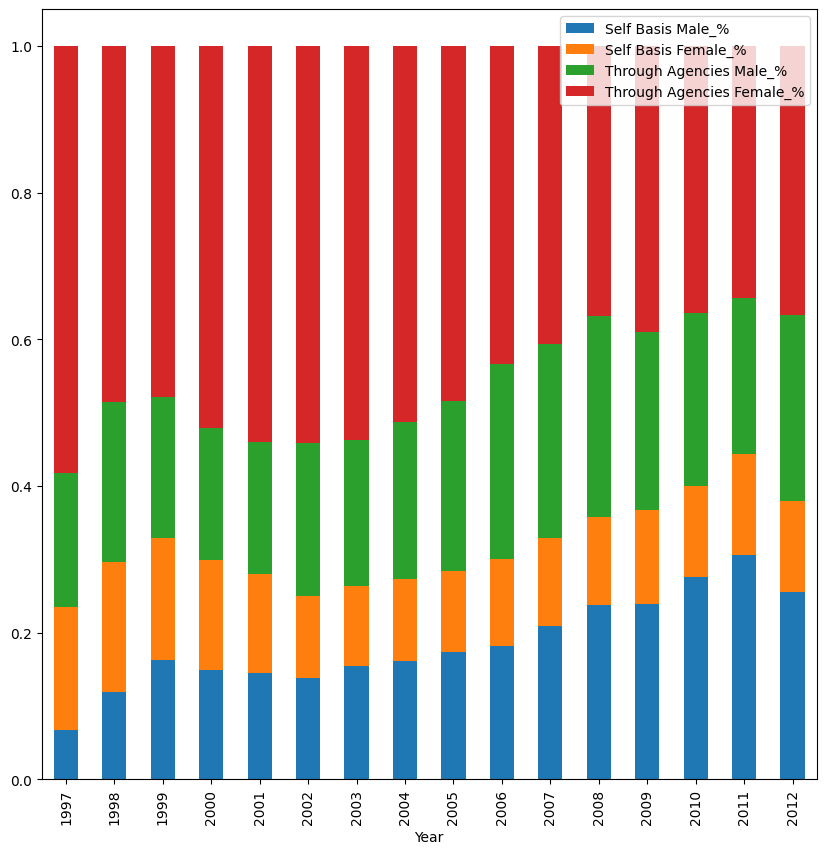

In [187]:
df_stacked_bar_graph.plot.bar(y=percent_columns, figsize=(10, 10), stacked=True)

In [188]:
df_stacked_bar_graph['Male_%'] = df_stacked_bar_graph['Self Basis Male_%'] + df_stacked_bar_graph['Through Agencies Male_%']

In [189]:
df_stacked_bar_graph['Female_%'] = df_stacked_bar_graph['Self Basis Female_%'] + df_stacked_bar_graph['Through Agencies Female_%']

In [190]:
main_gender = ['Male_%', 'Female_%']

In [194]:
df_stacked_bar_graph_gender = df_stacked_bar_graph[['Male_%', 'Female_%']]

<Axes: xlabel='Year'>

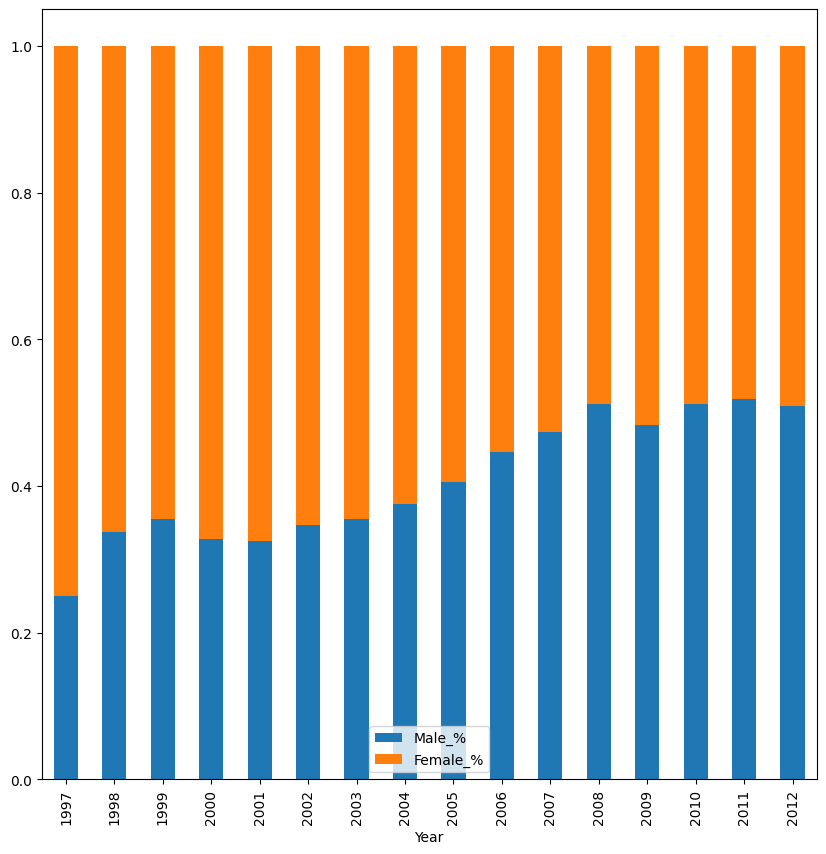

In [197]:
df_stacked_bar_graph_gender.plot.bar(y=main_gender, figsize=(10, 10), stacked=True)

In [198]:
# male percentage has increased over time

In [199]:
import seaborn as sns

In [200]:
df

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female,total
Year,,,,,
1997,10048,25185,27504,87546,150283
1998,18918,28335,34949,77614,159816
1999,29123,29985,34597,86030,179735
2000,27157,27416,32636,94979,182188
2001,26620,24920,33187,99280,184007
2002,28030,22769,42492,110482,203773
2003,32487,22662,42021,112676,209846
2004,34563,24000,46136,110010,214709
2005,40146,25437,53750,111957,231290


In [201]:
df_sea = df.drop(columns=['total'], inplace=False)

In [202]:
df_sea

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
Year,,,,
1997,10048,25185,27504,87546
1998,18918,28335,34949,77614
1999,29123,29985,34597,86030
2000,27157,27416,32636,94979
2001,26620,24920,33187,99280
2002,28030,22769,42492,110482
2003,32487,22662,42021,112676
2004,34563,24000,46136,110010
2005,40146,25437,53750,111957


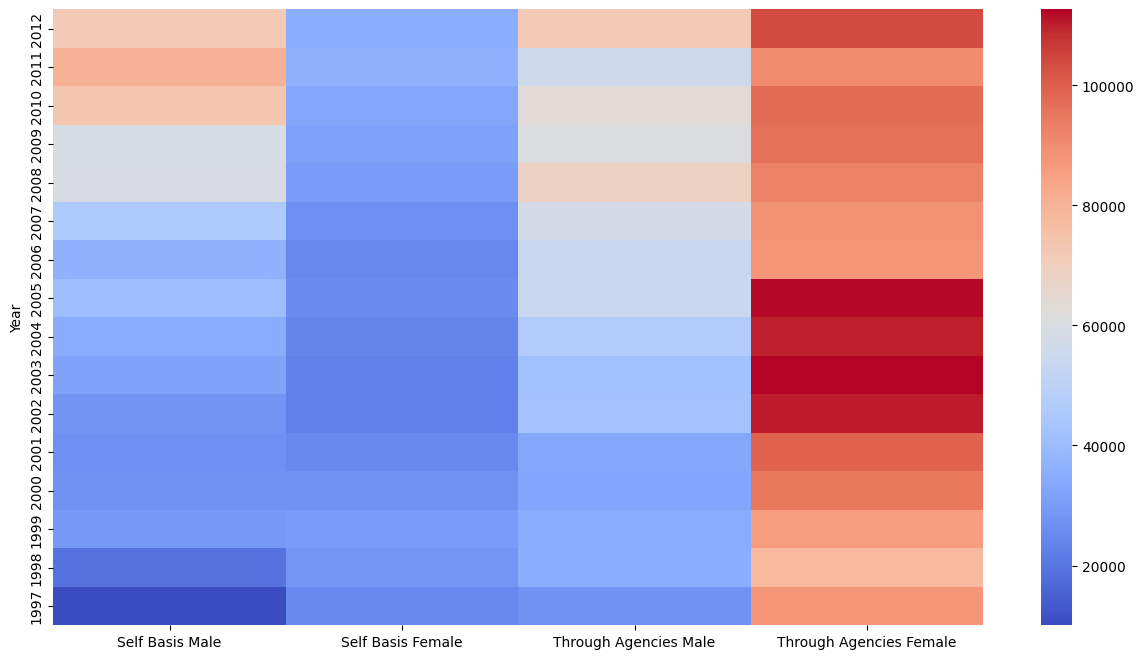

In [203]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax_1 = sns.heatmap(df_sea, cmap='coolwarm')
ax_1.invert_yaxis()

In [204]:
# count of women migrating has peaked over 2002- 2004

In [205]:
df_sea

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
Year,,,,
1997,10048,25185,27504,87546
1998,18918,28335,34949,77614
1999,29123,29985,34597,86030
2000,27157,27416,32636,94979
2001,26620,24920,33187,99280
2002,28030,22769,42492,110482
2003,32487,22662,42021,112676
2004,34563,24000,46136,110010
2005,40146,25437,53750,111957


In [206]:
correl = df_sea.corr()

In [207]:
correl

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
Self Basis Male,1.000000,0.796291,0.874640,0.089900
Self Basis Female,0.796291,1.000000,0.550563,-0.323953
Through Agencies Male,0.874640,0.550563,1.000000,0.159999
Through Agencies Female,0.089900,-0.323953,0.159999,1.000000


<Axes: >

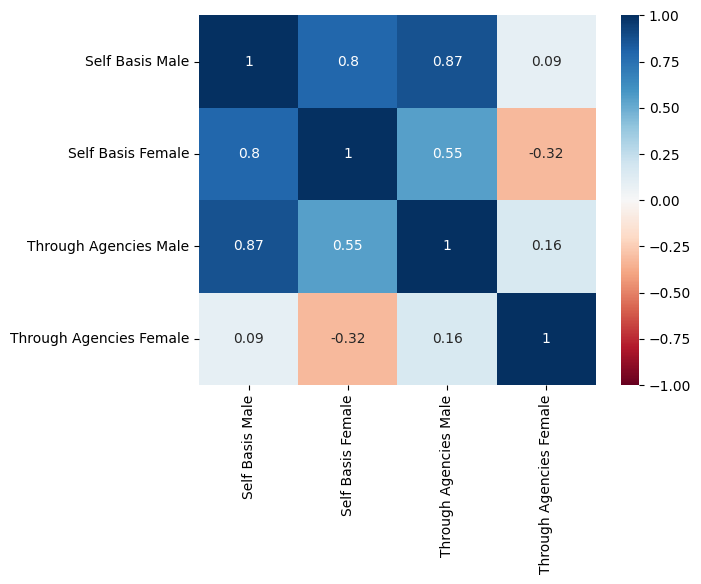

In [208]:
sns.heatmap(correl, cmap='RdBu', vmin = -1, vmax = 1, annot=True)

# agency female has no correlation with any other metric

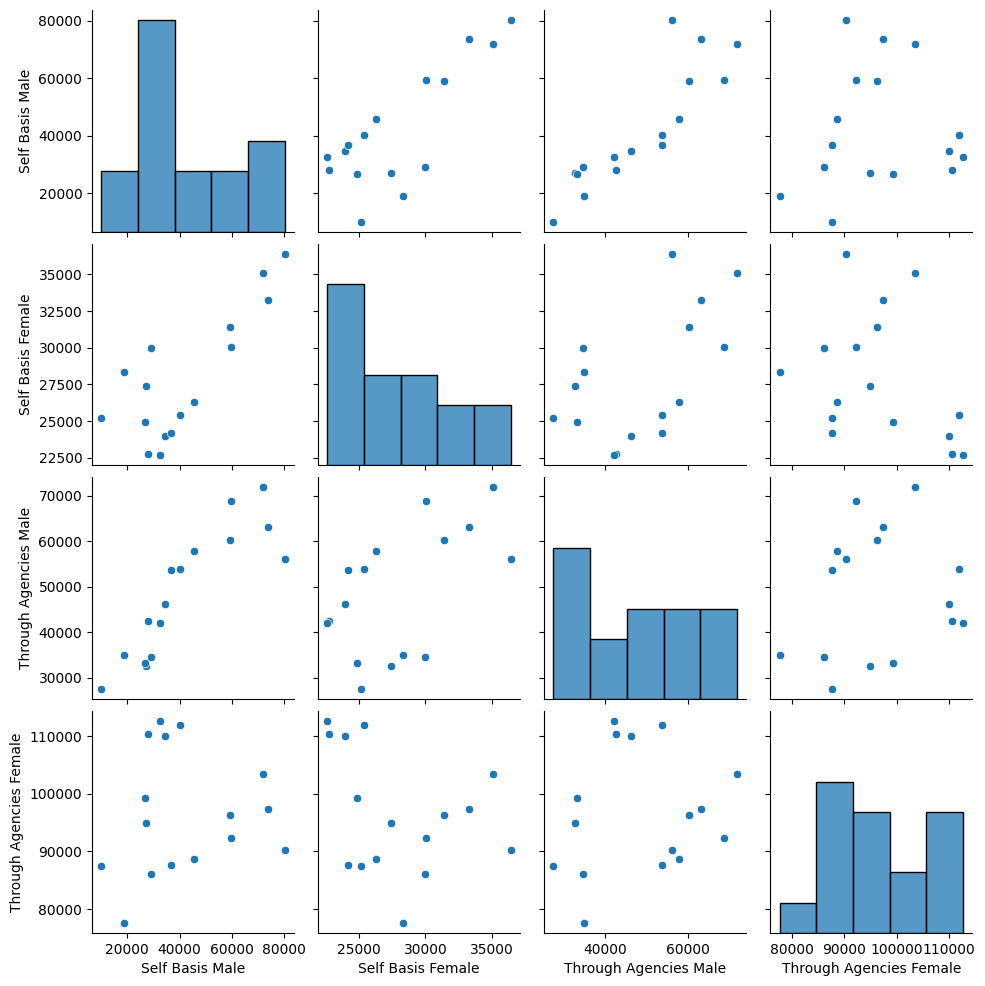

In [209]:
sns.pairplot(df_sea)

In [210]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [211]:
from prophet import Prophet

In [212]:
df_sea

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
Year,,,,
1997,10048,25185,27504,87546
1998,18918,28335,34949,77614
1999,29123,29985,34597,86030
2000,27157,27416,32636,94979
2001,26620,24920,33187,99280
2002,28030,22769,42492,110482
2003,32487,22662,42021,112676
2004,34563,24000,46136,110010
2005,40146,25437,53750,111957


In [213]:
df_prphet = df_sea.reset_index(inplace=False).rename(columns={'Year': 'ds', 'Self Basis Male' : 'y'}, inplace=False).loc[:,['ds','y']]

In [214]:
df_prphet['ds'] = pd.to_datetime(df_prphet['ds'], format='%Y')

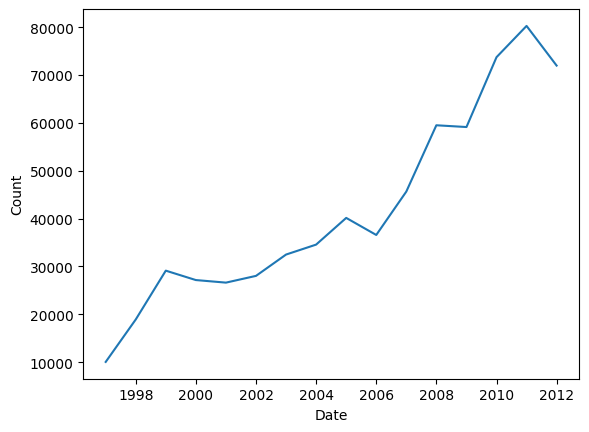

In [215]:
plt.plot(df_prphet['ds'], df_prphet['y'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [216]:
model = Prophet()
model.fit(df_prphet)

04:36:57 - cmdstanpy - INFO - Chain [1] start processing
04:36:57 - cmdstanpy - INFO - Chain [1] done processing


In [217]:
future = model.make_future_dataframe(periods=3, freq='Y')
future.tail()

,ds
14,2011-01-01
15,2012-01-01
16,2012-12-31
17,2013-12-31
18,2014-12-31


In [218]:
forecast = model.predict(future)

In [219]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()) 

           ds          yhat    yhat_lower    yhat_upper
14 2011-01-01  69608.089845  62238.202622  77172.598292
15 2012-01-01  74233.671470  66836.068021  81782.892943
16 2012-12-31  78434.307826  71025.051822  86189.395848
17 2013-12-31  82210.283615  74403.886325  89291.625325
18 2014-12-31  85562.620411  77683.880396  94105.137103


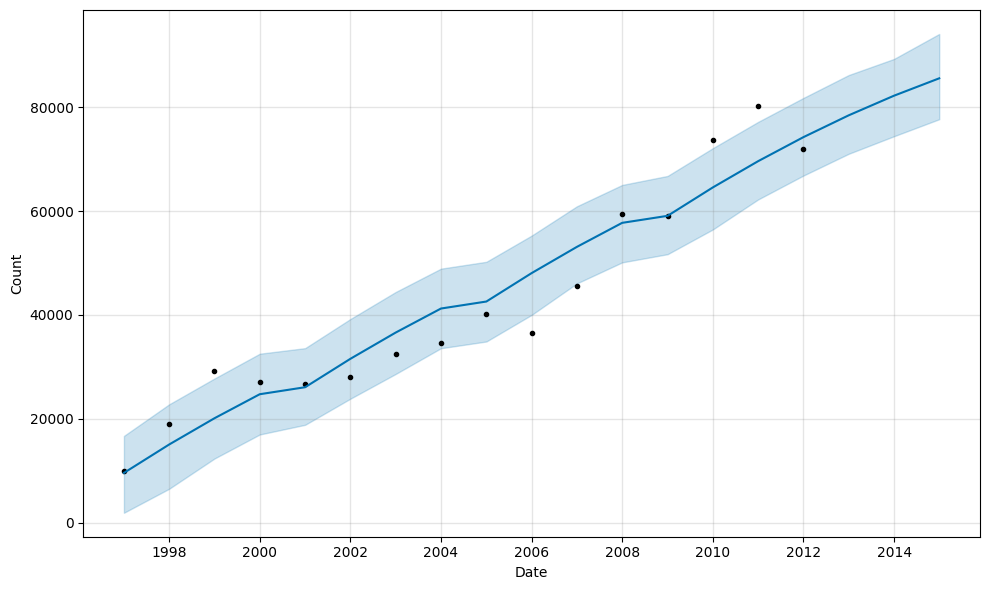

In [220]:
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [221]:
# 85k Men will migrate via ageniceis in 4 Years!

In [119]:
df_sea

,Self Basis Male,Self Basis Female,Through Agencies Male,Through Agencies Female
Year,,,,
1997,10048,25185,27504,87546
1998,18918,28335,34949,77614
1999,29123,29985,34597,86030
2000,27157,27416,32636,94979
2001,26620,24920,33187,99280
2002,28030,22769,42492,110482
2003,32487,22662,42021,112676
2004,34563,24000,46136,110010
2005,40146,25437,53750,111957
